# CO2 Emissions, Canada Regression

## Imports

Dataframe imports

In [1]:
import pandas as pd
emissions_df = pd.DataFrame(pd.read_csv("CO2 Emissions_Canada.csv"))

Visualisation imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Preprocessing imports

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Regression model imports

In [4]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## Data exploration and understanding

The first thing is to note what we are targetting. In this project, it is CO2 Emissions(g/km).

In [5]:
target = ["CO2 Emissions(g/km)"]

We are going to save a sample X_future and y_future for future predictions. Once the prediction input is ready we can continue on with the initial exploration. 

In [6]:
X_future = emissions_df[0:1]
emissions_df = emissions_df[1:]
y_future = X_future[target]
X_future.drop("CO2 Emissions(g/km)", axis=1, inplace=True)
X_future

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33


In [7]:
y_future

,CO2 Emissions(g/km)
0,196


At first glance, you can note that there exist multiple qualitative attributes.
* Make: Describes the brand. 
* Model: Describes the instance of the product range. 
* Vehicle Class: Describes the size of the car. 
* Transmission: Describes the transmission. This is either automatic, automated manual, automatic with select shift, continuously variable, manual or the number of gears.
* Fuel Type: Describes whether it takes regular/premium gasoline, diesal, ethanol or natrual gas for the fuel source.

In [8]:
emissions_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


There exist no missing values.

In [9]:
emissions_df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

We would like to get an idea of the quantitative values we are working with- this can be done with the describe function. 

What we discover quite quickly is that the values between attributes are quite large. This indicates we will need to normalise our training set before we start fitting our models. 

In [10]:
emissions_df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,3.160225,5.615249,12.556893,9.042023,10.975406,27.480905,250.592091
std,1.354195,1.828334,3.500375,2.224440,2.892559,7.232084,58.513193
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Clearly, some data is qualitative. We need to investigate what can and cannot be exploited. 

In [11]:
emissions_df.select_dtypes(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
5,ACURA,RLX,MID-SIZE,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


## Visualisation

Using a heatmap and a pairplot to highlight certain correlations may be insightful. I am using both the sns.heatmap and sns.pairplot retrieve similar insights.

The most blatant observation is that of a strong, negative correlation to that of Fuel Consumption Comb (mpg) and every other attribute. 

<AxesSubplot:>

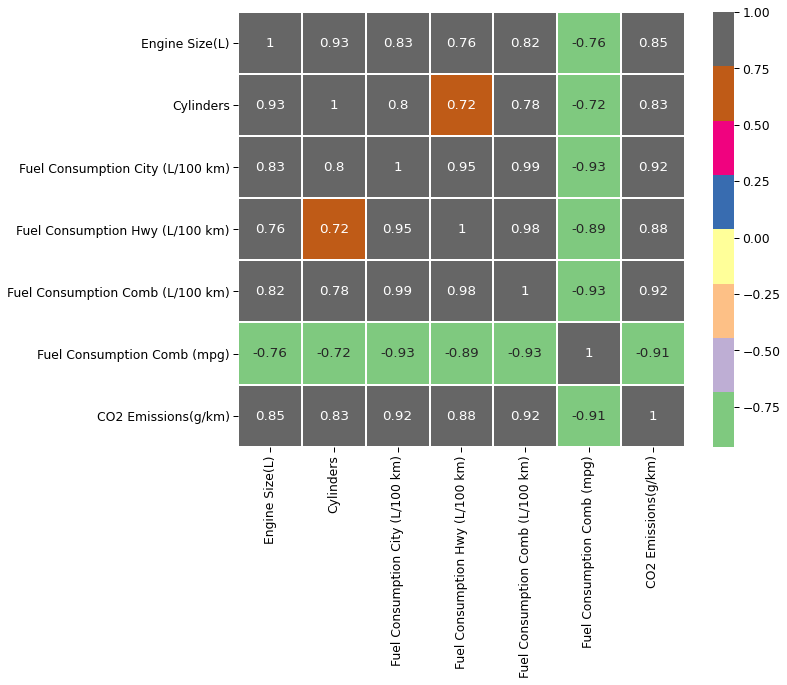

In [12]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(
    emissions_df.corr(), 
    annot=True, 
    cmap='Accent',
    linewidths=.2)

Because this dataset has so many continuous attributes, it may be worth investigating with some pair plots- highlighting with qualitiative attributes of interest. This is only an overview but it gives a really good idea of the set. 

c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Python39\lib\site-packages\seaborn\distributions.

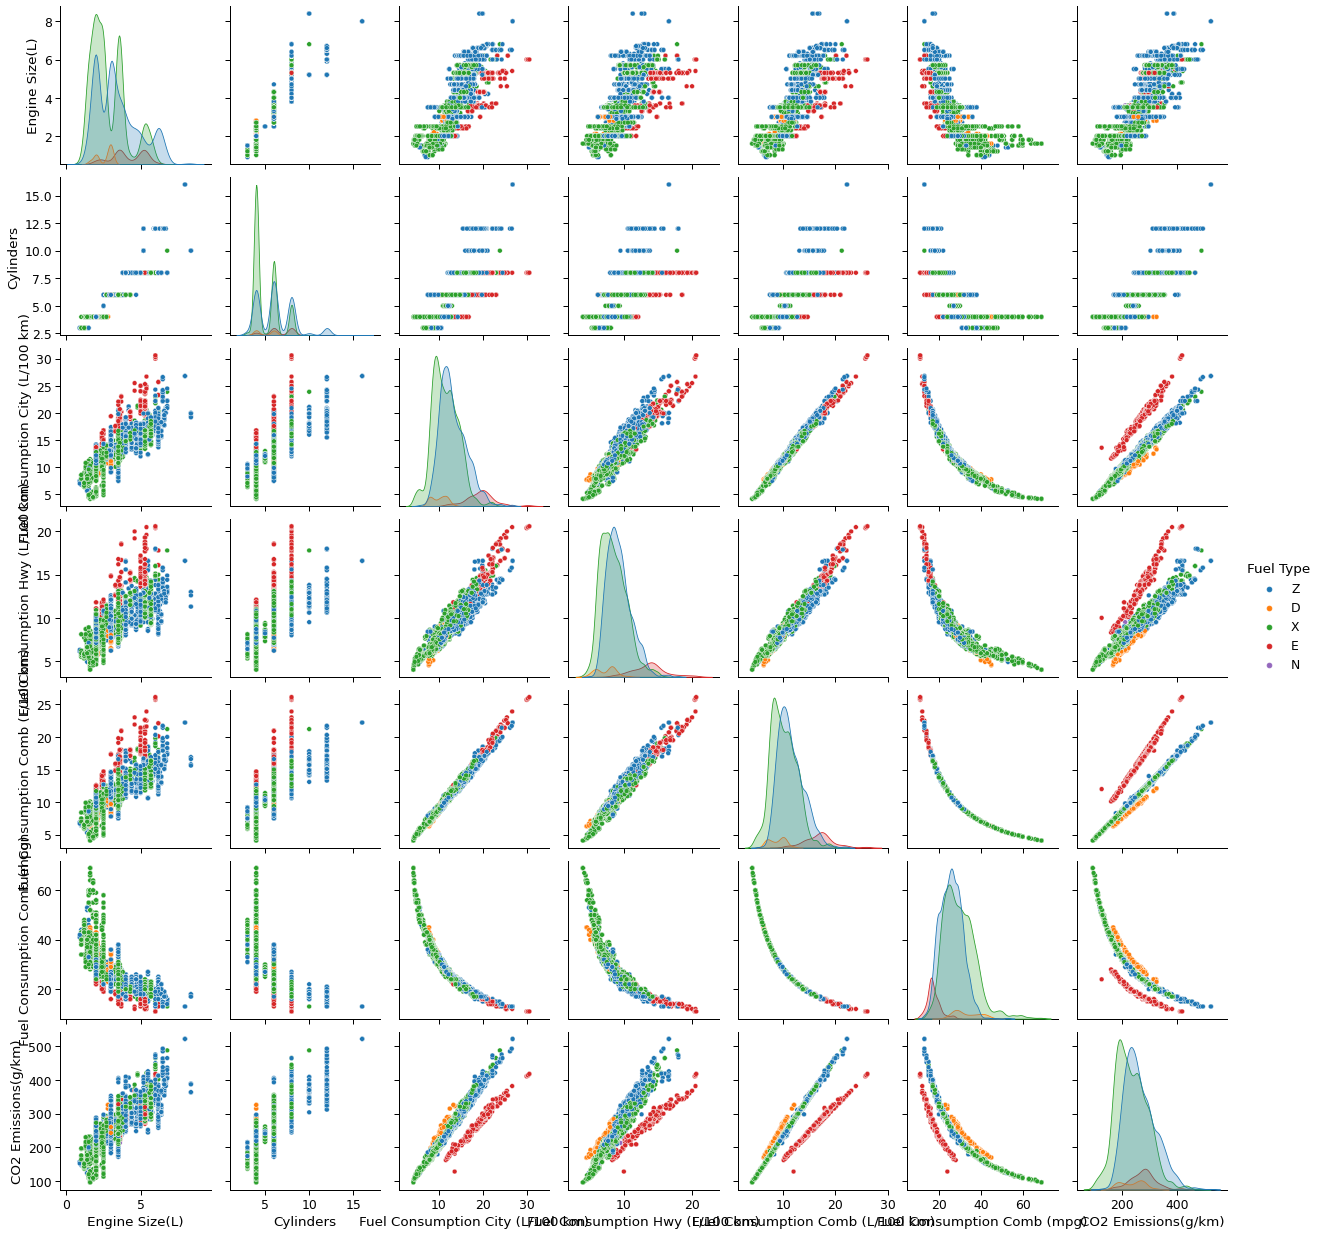

In [13]:
sns.pairplot(emissions_df, hue='Fuel Type')

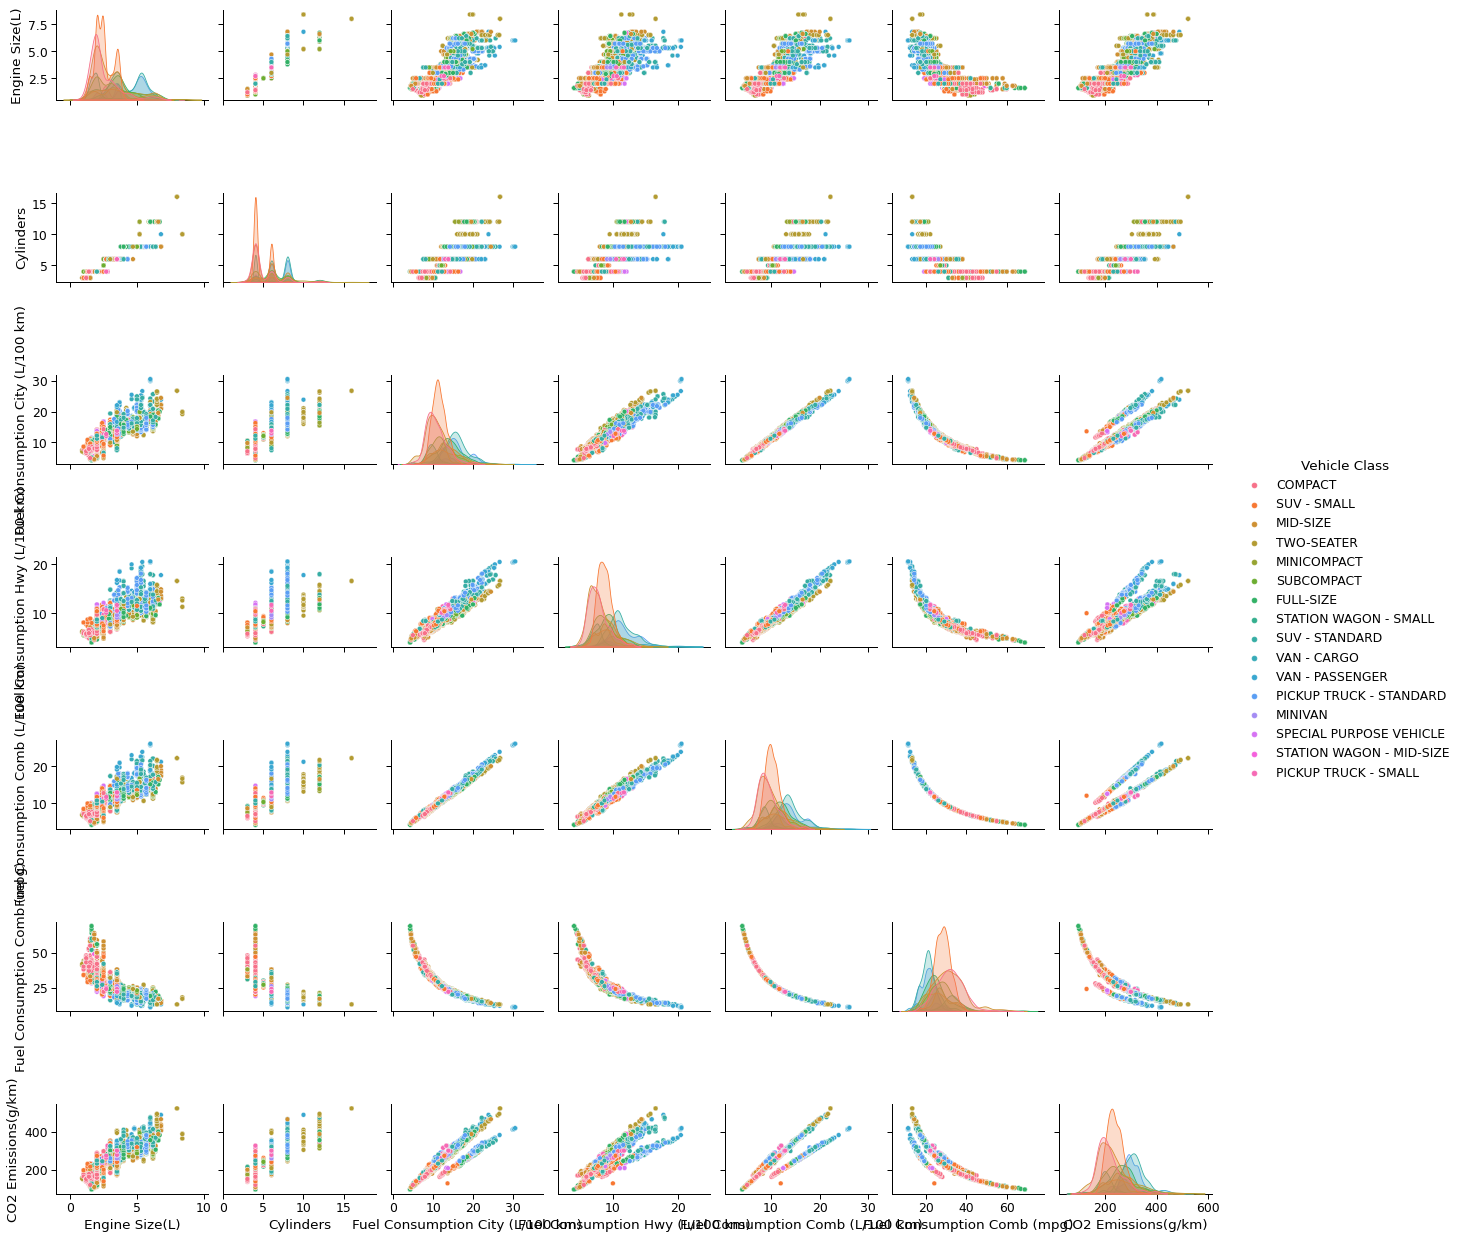

In [14]:
sns.pairplot(emissions_df, hue='Vehicle Class')

As CO2 emissions increase, we can see the following also increase...
* Engine size
* Cylinders
* Fuel consumption
Within these attributes, there is a clear presence of premium gasoline and 2-seater cars. 

There is a clear inverse relationship between miles per gallon and every other attribute. 
* Z = Premium
* D = Diesel
* X = Regular
* E = Ethanol 
* N = Natural gas

## Data preparation

The very first thing to do is separate the input and output. The output is going to be the regressed estimate of "CO2 Emissions(g/km)". 

In [15]:
X, y = emissions_df.drop(target, axis=1), emissions_df[target]

There are 2053 different models in this dataset. The saying "wide as an ocean, deep as a puddle" comes to mind. There are far too little instances of multiple models to fairly compare them to eachother. 

Not only this, but binarising this value in the next step would be extreely messy, producing 2053 new columns. 

I have chosen to drop this attribute for this reason. 

In [16]:
print(emissions_df["Model"].value_counts())
X.drop("Model", axis=1, inplace=True)

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC 5                 20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64


The remaining attributes can be binarised to provide further value to our regression. Here we can now consider the qualitiative values as binary values. 

This is done with a simple custom function to quickly use the pd.get_dummies function to binaries the attributes. 

In [17]:
def dummify(X, att):
  dummy = pd.get_dummies(X[att])
  X.drop(att, axis=1, inplace=True)
  return pd.concat([X, dummy], axis=1)

#Binarise the following
for o in X.select_dtypes(include=['object']).columns:
    X = dummify(X, o)

X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,AV7,AV8,M5,M6,M7,D,E,N,X,Z
1,2.4,4,11.2,7.7,9.6,29,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.5,6,11.9,7.7,10.0,28,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The final step of our preprocessing is to normalise the values. This allows our models to fit to the data without discrimination or bias. 

In [18]:
atts = X.columns

scaler = StandardScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)
X.columns = atts

## Data analysis

Immedietly after the preprocessing, we can ready our training and testing data. 

I have opted to use an 80/20 split for the train/test sets for a nice balance. 

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,AV7,AV8,M5,M6,M7,D,E,N,X,Z
5025,2.466411,3.492351,3.326471,2.453807,3.050998,-1.864168,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
898,-0.118325,0.210452,-0.216247,0.385731,-0.026071,-0.204783,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
95,-0.118325,0.210452,-0.244817,-0.558391,-0.371809,0.210064,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
6601,-0.118325,0.210452,0.440870,0.565563,0.492536,-0.619629,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
6545,-0.856822,-0.883514,-0.530520,-0.468475,-0.510104,0.348346,-0.098533,-0.06387,-0.080037,4.981785,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,-0.118325,0.210452,0.955136,0.925229,0.941996,-0.896193,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144
3297,-0.856822,-0.883514,-0.844793,-1.052931,-0.924990,0.901474,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,1.015010,-0.874780
763,-0.782972,-0.883514,-0.844793,-0.873098,-0.855842,0.763192,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,6.418277,-0.229677,-0.011638,-0.985212,-0.874780
6821,1.358667,1.304419,0.698003,0.026065,0.457962,-0.619629,-0.098533,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,1.015010,-0.874780


## Models

We have finally made it to the models. 

Because we are regressing, we obviously need some regression models. 

* Support vector regression
* K-nearest neighbour regression
* Linear regression

There is no obvious best choice for our regression. So the best way to approach this is to just implement them and see what sticks. 

In [20]:
models = {
    "svr" : SVR(kernel='linear',
          epsilon=0.1),
    "knn" : KNeighborsRegressor(n_neighbors=3,
                          algorithm='auto',
                          metric='minkowski'),
    "lr" : LinearRegression()
}

In [21]:
reg_models = {}

for model in models:
    reg_model = models[model].fit(X_train, y_train.values.ravel())
    score = reg_model.score(X_test, y_test)
    reg_models[model] = reg_model
    
    print(f"{model}: {round(score, 4)}%")

svr: 0.9918%
knn: 0.9677%
lr: 0.9937%


## Prediction

Remember our X_future set, well now we are ready to use and predict it.

In [22]:
for o in X_future.select_dtypes(include=['object']).columns:
    X_future = dummify(X_future, o)
    
X_future = X_future.reindex_like(X)[0:1]

X_future.fillna(0, inplace=True)

X_future

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,AV7,AV8,M5,M6,M7,D,E,N,X,Z
0,2.0,4.0,9.9,6.7,8.5,33.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
X_future = scaler.transform(X_future)

X_future = pd.DataFrame(X_future)
X_future.columns = atts
X_future

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,AV7,AV8,M5,M6,M7,D,E,N,X,Z
0,-0.856822,-0.883514,-0.759083,-1.052931,-0.855842,0.763192,10.148892,-0.06387,-0.080037,-0.200731,...,-0.127436,-0.072868,-0.163826,-0.372799,-0.111704,-0.155805,-0.229677,-0.011638,-0.985212,1.143144


In [24]:
for r in reg_models:
    prediction = reg_models[r].predict(X_future)[0]
    print(f"{r} predicts this instance to have {round(prediction, 4)} C02 emission when the true value is {y_future.loc[0][0]}")

svr predicts this instance to have 194.9197 C02 emission when the true value is 196
knn predicts this instance to have 214.0 C02 emission when the true value is 196
lr predicts this instance to have 195.1162 C02 emission when the true value is 196
